In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
from scipy.ndimage import gaussian_laplace
import cv2
from google.colab.patches import cv2_imshow
from scipy.ndimage import maximum_filter

In [ ]:
class cartoon:
  def __init__(self, Image,GreyScale=None,Filtered=None,Edged=None,Inverted=None,Cartooned=None):
    self.Image = Image
    self.GreyScale= GreyScale
    self.Filtered=Filtered
    self.Edged=Edged
    self.Inverted=Inverted
    self.Cartooned=Cartooned

  def median_filter(self,Kernal_size):
    kernel_size = Kernal_size
    self.Filtered = cv2.medianBlur(self.Image, kernel_size)

  def EdgeDetector(self,Threshold):
    laplacian = cv2.Laplacian(self.GreyScale, cv2.CV_64F)
    threshold_value = Threshold
    ret, self.Edged = cv2.threshold(laplacian, threshold_value, 255, cv2.THRESH_BINARY)

  def apply_cartoon_effect(self, color_strength, positional_strength, size, repetitions):
    for _ in range(repetitions):
        image = cv2.bilateralFilter(self.Image, size, color_strength, positional_strength)
    return image

  def Cartonization(self,Kernal_size):

    self.Image = cv2.imread(self.Image)

    self.GreyScale = cv2.cvtColor(self.Image, cv2.COLOR_BGR2GRAY)

    self.median_filter(Kernal_size)

    threshold=50
    self.EdgeDetector(threshold)


    self.Inverted = 255 - self.Edged

    color_strength = 60
    positional_strength = 60
    size = 9
    repetitions = 2
    cartoon_image = self.apply_cartoon_effect(color_strength, positional_strength, size, repetitions)

    overlay = np.zeros_like(cartoon_image)
    overlay[self.Edged < 128] = cartoon_image[self.Edged < 128]
    self.Cartooned=overlay

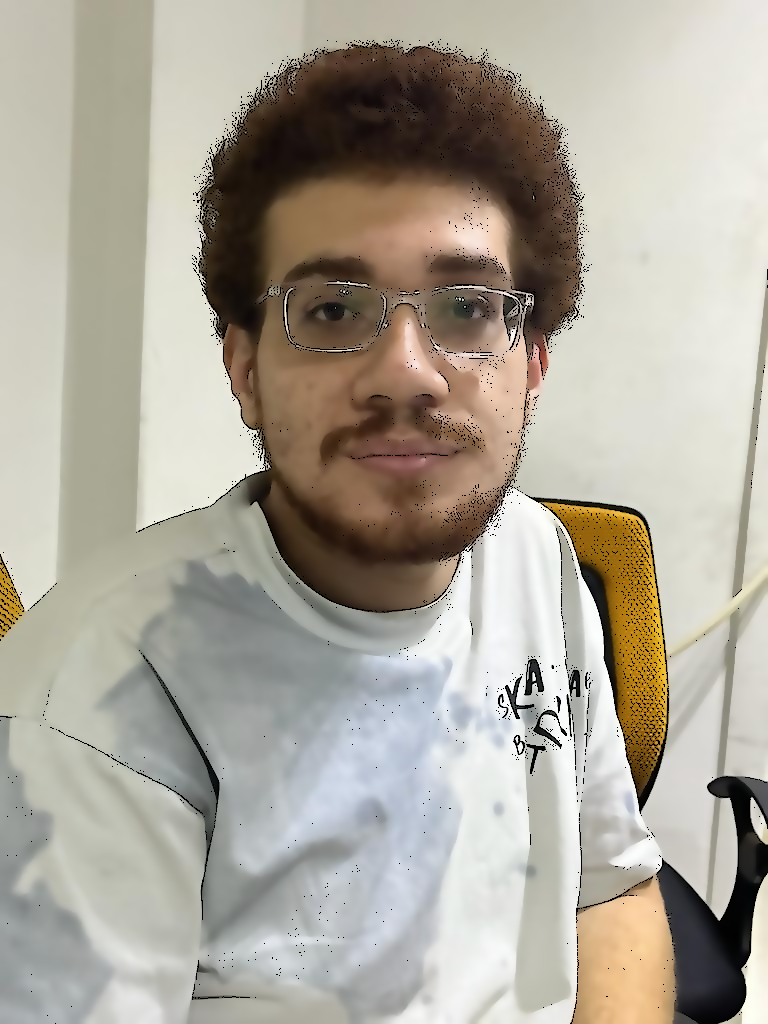

In [ ]:
image1= cartoon('/content/download.png')
image1.Cartonization(5)
cv2_imshow(image1.Cartooned)

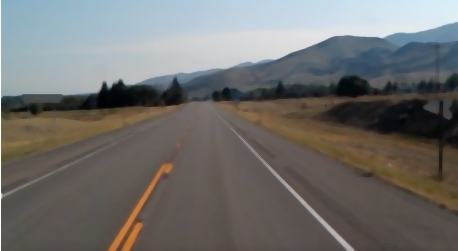

In [ ]:
image = cv2.imread("/content/WhatsApp Image 2023-11-11 at 12.55.29 AM.jpeg")
ksize = 5

median_filtered = cv2.medianBlur(image, ksize)

# black_image = image*0
cv2_imshow(median_filtered)


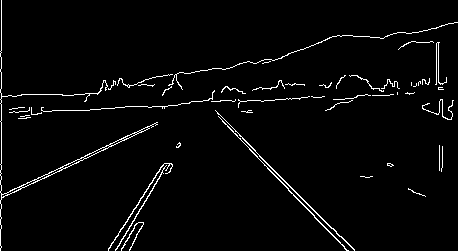

In [ ]:
low_threshold = 150
high_threshold = 250

edges = cv2.Canny(image, low_threshold, high_threshold)
cv2_imshow(edges)

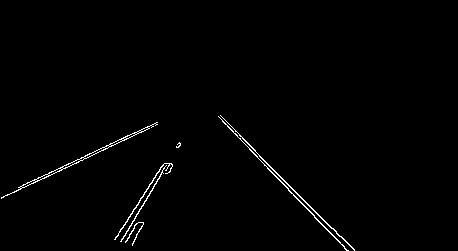

In [ ]:
mask = np.zeros_like(edges)
ignore_mask_color = 255

roi_vertices = np.array([[(0, 198), (140, 115), (240, 115), (450, 360)]], dtype=np.int32)
cv2.fillPoly(mask, roi_vertices, ignore_mask_color)

masked_edges = cv2.bitwise_and(edges, mask)
cv2_imshow(masked_edges)

In [ ]:
max_rho = int(np.hypot(masked_edges.shape[0], masked_edges.shape[1]))

edge_points = np.column_stack(np.where(masked_edges > 0))

H = np.zeros((181, max_rho), dtype=np.uint8)

for (x, y) in edge_points:
    for theta in range(181):
        radians = np.deg2rad(theta)
        rho = int(x * np.cos(radians) + y * np.sin(radians))
        H[theta, rho] += 1

H_suppressed = maximum_filter(H, size=15, mode='constant')
H = np.where(H == H_suppressed, H, 0)

threshold = 80
peak_indices = np.where(H > threshold)

theta_peaks = peak_indices[0]
rho_peaks = peak_indices[1]




for i in range(len(theta_peaks)):
    theta =  np.deg2rad(theta_peaks[i])
    rho = rho_peaks[i]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    y1 = int(x0 + 500 * (-b))
    x1 = int(y0 + 500 * a)
    y2 = int(x0 - 500 * (-b))
    x2 = int(y0 - 500 * a)
    cv2.line(image, (x1, y1), (x2, y2), (255,0 , 0), 3)


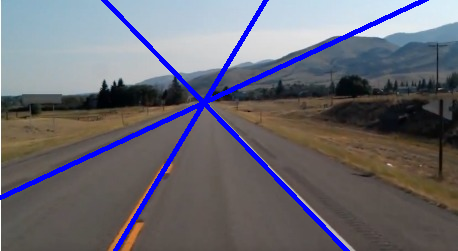

In [ ]:
cv2_imshow(image)